In [1]:
import json
import pandas as pd
import numpy as np
import prettytable as pt
import os
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [2]:
swappositiondata = {}
swappositiondata["notional"]=10000000
swappositiondata["valuationDate"]="2021-06-02"
swappositiondata["settlementDate"]="2021-06-04"
swappositiondata["maturityDate"]="2026-06-04"
swappositiondata["startDate"]="2021-06-04"
swappositiondata["currency"]= "USD"
swappositiondata

{'notional': 10000000,
 'valuationDate': '2021-06-02',
 'settlementDate': '2021-06-04',
 'maturityDate': '2026-06-04',
 'startDate': '2021-06-04',
 'currency': 'USD'}

In [3]:
#swap fixedleg definition
fixedLeg={}
fixedLeg["payOrReceive"]="Receive"
fixedLeg["coupon"]= 0.0085
fixedLeg["frequency"]="Semiannual"
fixedLeg["dayCounter"]="Thirty360"
fixedLeg["calendar"]= "UnitedStates"
fixedLeg["businessDayConvention"]="ModifiedFollowing"
fixedLeg["maturityDateConvention"]="ModifiedFollowing"
fixedLeg["dateGeneration"]="Backward"
fixedLeg["endOfMonth"]=True
fixedLeg

{'payOrReceive': 'Receive',
 'coupon': 0.0085,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True}

In [4]:
floatingLeg={}
floatingLeg["frequency"]="Quarterly"
floatingLeg["spread"]=0.0
floatingLeg["index"]="TRLibor6M"
floatingLeg["dayCounter"]="Actual360"
floatingLeg["calendar"]="UnitedStates"
floatingLeg["businessDayConvention"]="ModifiedFollowing"
floatingLeg["maturityDateConvention"]="ModifiedFollowing"
floatingLeg["dateGeneration"]="Backward"
floatingLeg["endOfMonth"]=True
#floatingLeg["fixingDate"]=["2021-06-02"]
#floatingLeg["fixingRate"]=[0.0012850]
floatingLeg["fixingDate"]=[]
floatingLeg["fixingRate"]=[]
floatingLeg

{'frequency': 'Quarterly',
 'spread': 0.0,
 'index': 'TRLibor6M',
 'dayCounter': 'Actual360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'fixingDate': [],
 'fixingRate': []}

In [5]:
instruments={}
depo={}
futures={}
irs={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

futures["businessDayConvention"]="ModifiedFollowing"  # if it is null, default value is used
futures["dayCounter"]= "Actual360"                    # if it is null, default value is used
futures["market"]="IMM"                               
futures["usedates"]=False                             

irs["businessDayConvention"]="ModifiedFollowing"      # if it is null, default value is used 
irs["dayCounter"]="Thirty360"                         # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["FUTURES"]=futures
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'},
 'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360',
  'market': 'IMM',
  'usedates': False},
 'IRS': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Thirty360',
  'frequency': 'Semiannual'}}

In [6]:
discountCurve={}
discountCurve["settlementDays"]=2  # for calculation
discountCurve["intpMethod"]= "Linear"  # for calculation
discountCurve["currency"]="USD" # Used to filter yielddata by currency
discountCurve["calendar"]="UnitedStates" # for calculation
discountCurve["dayCounter"]="Actual360"  # for calculation
discountCurve["period"]="3M"  # Used to filter yielddata by period
discountCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
discountCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [7]:
# Different forecastcurve can be defined. If it is not defined dicountCurve is used for calculation
floatingLegForecastCurve= {}
floatingLegForecastCurve["settlementDays"]=2  # for calculation
floatingLegForecastCurve["intpMethod"]= "Linear"  # for calculation
floatingLegForecastCurve["currency"]="USD" # Used to filter yielddata by currency
floatingLegForecastCurve["calendar"]="UnitedStates" # for calculation
floatingLegForecastCurve["dayCounter"]="Actual360"  # for calculation
floatingLegForecastCurve["period"]="3M"  # Used to filter yielddata by period
floatingLegForecastCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
floatingLegForecastCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [8]:
yieldData= yielddata.to_dict('r')

swappositiondata['fixedLeg']=fixedLeg
swappositiondata['floatingLeg']=floatingLeg
swappositiondata['discountCurve']=discountCurve
swappositiondata['floatingLegForecastCurve']=floatingLegForecastCurve
swappositiondata['yieldData']=yieldData

try:
    data = api.createTask(CalculationType.INTEREST_RATES_SWAP, swappositiondata,True)
    result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [9]:
type(swappositiondata)

dict

In [10]:
cashflow=pd.DataFrame(result.get('data'))

In [11]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Fixed Leg PV', result.get('fixedLegPv')])
npvTable.add_row(['Float Leg PV', result.get('floatingLegPv')])
npvTable.add_row(['PV01', result.get('PV01')])
npvTable.add_row(['DV01', result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+---------------+--------------+
|    Parameters |        Value |
+---------------+--------------+
|            PV |  -13048.6425 |
|  Fixed Leg PV |  418541.3646 |
|  Float Leg PV | -431590.0071 |
|          PV01 |    4924.0161 |
|          DV01 |   -5000.8815 |
|     Fair Rate |       0.8765 |
|   Fair Spread |      -0.0261 |
| Implied Quote |       0.8765 |
+---------------+--------------+


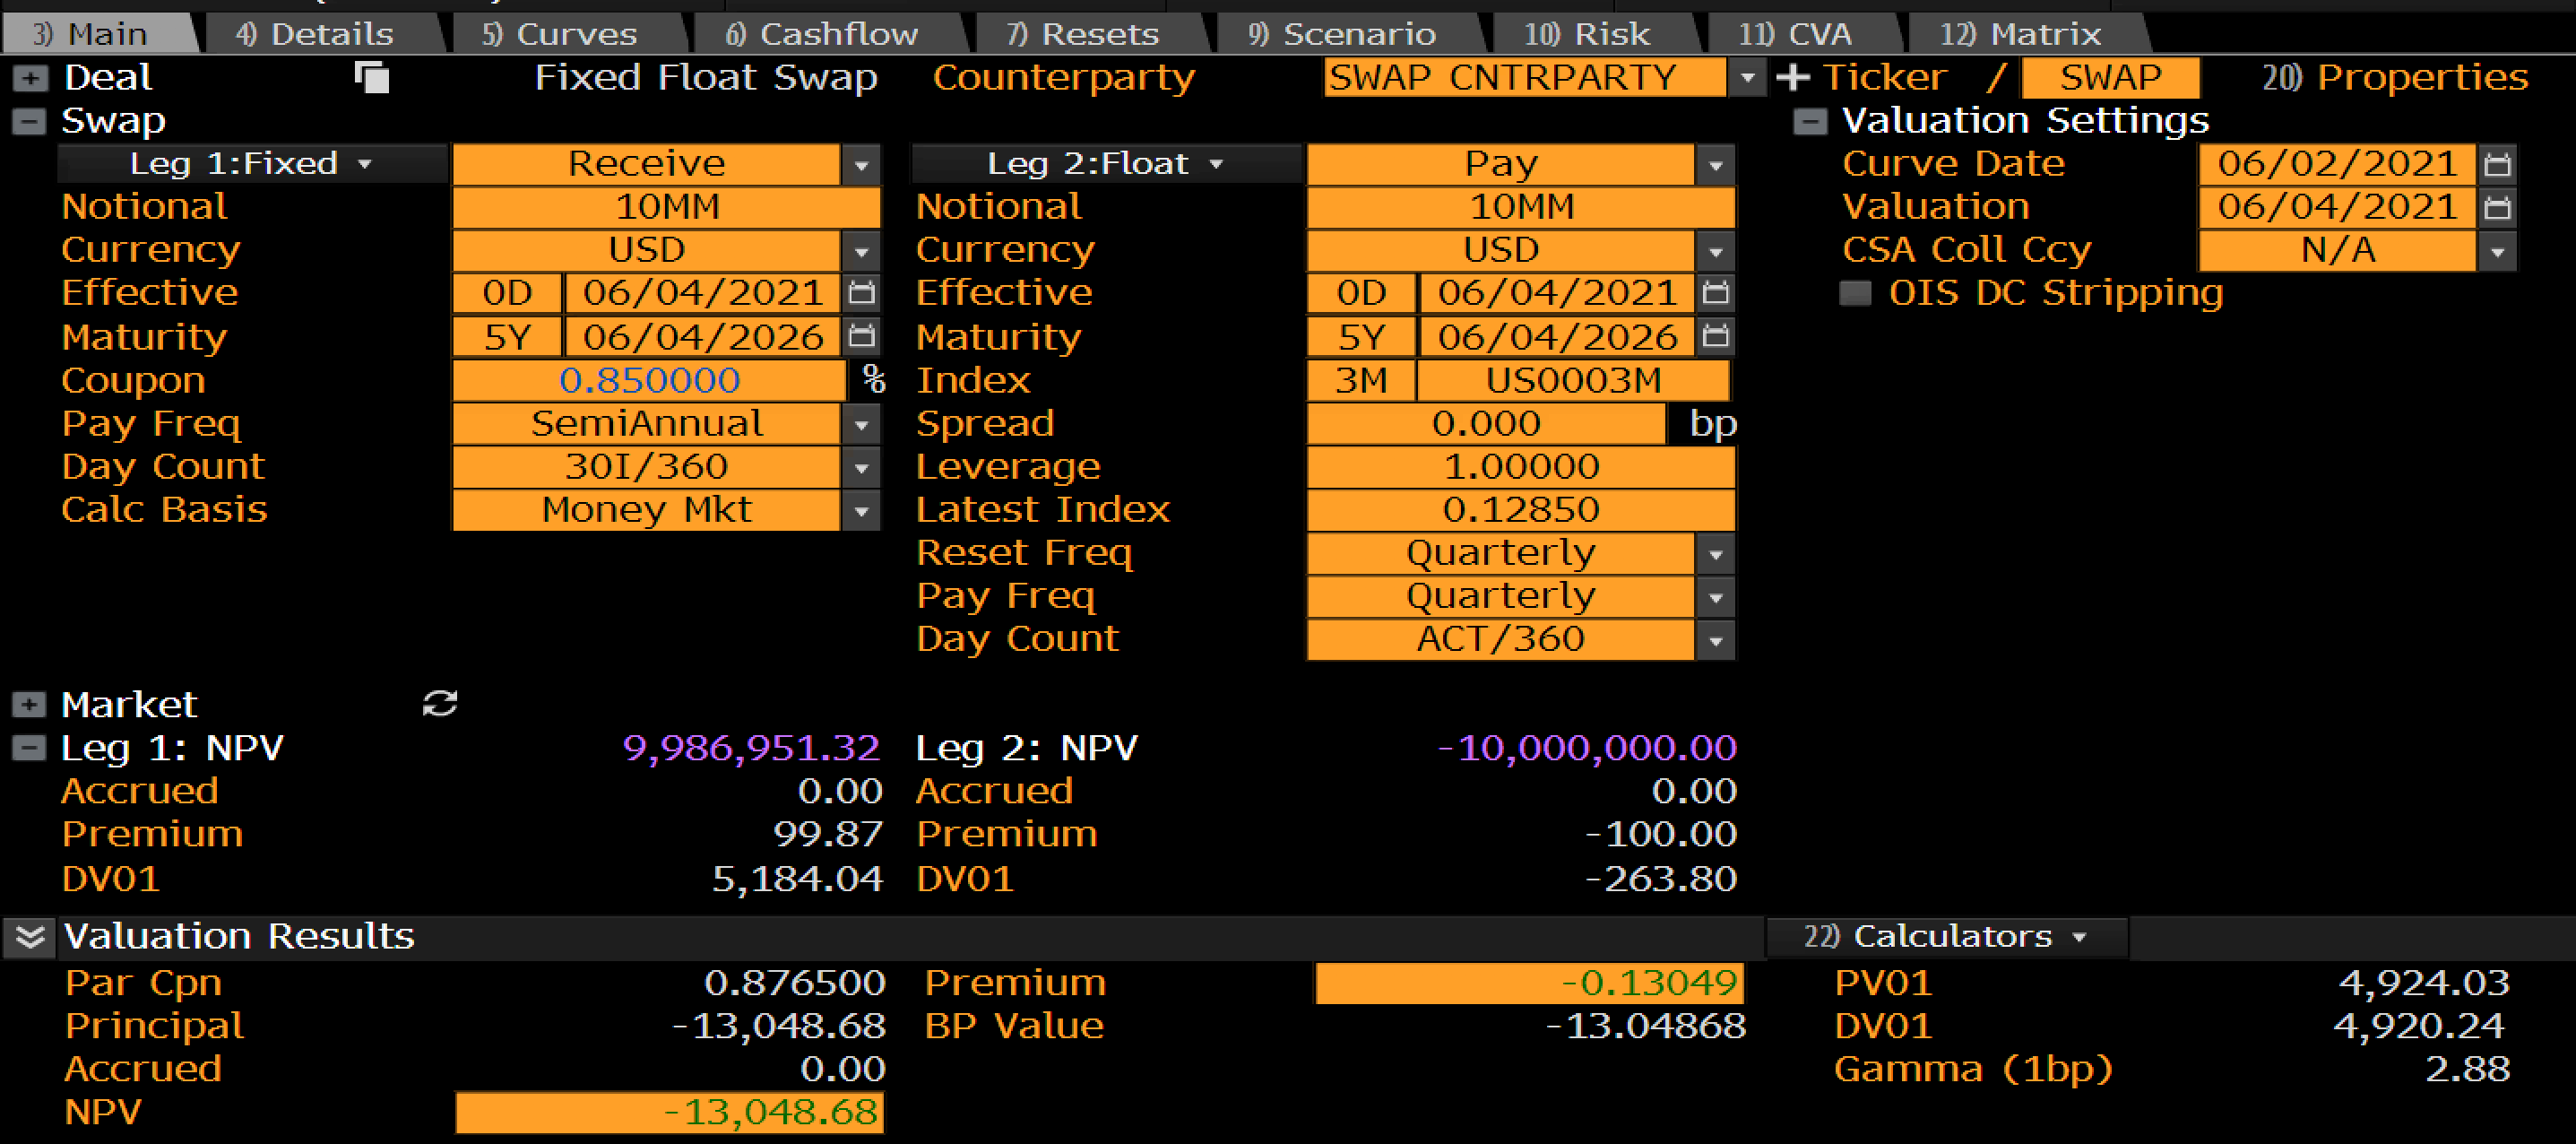

In [12]:
fixedleg=cashflow[cashflow['leg']=='Fixed']
fixedleg

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
0,2021-06-02,2021-06-04,2021-12-06,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.001270,0,182,0.505556,42972.222222,0.999358,42944.648888
1,2021-12-02,2021-12-06,2022-06-06,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.001457,0,362,1.005556,42500.000000,0.998536,42437.776137
2,2022-06-02,2022-06-06,2022-12-05,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.001716,0,541,1.502778,42263.888889,0.997425,42155.060372
3,2022-12-01,2022-12-05,2023-06-05,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.002277,0,721,2.002778,42500.000000,0.995450,42306.632472
4,2023-06-01,2023-06-05,2023-12-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.003242,0,900,2.500000,42263.888889,0.991927,41922.692760
5,2023-11-30,2023-12-04,2024-06-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.004213,0,1080,3.000000,42500.000000,0.987440,41966.196500
6,2024-05-31,2024-06-04,2024-12-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.005415,0,1260,3.500000,42500.000000,0.981226,41702.089443
7,2024-12-02,2024-12-04,2025-06-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.006606,0,1440,4.000000,42500.000000,0.973922,41391.671520
8,2025-06-02,2025-06-04,2025-12-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.007720,0,1620,4.500000,42500.000000,0.965855,41048.853990
9,2025-12-02,2025-12-04,2026-06-04,10000000,USD,Fixed,Receive,Interest Rate Swap,0.0085,0.008824,0,1800,5.000000,42500.000000,0.956841,40665.742470


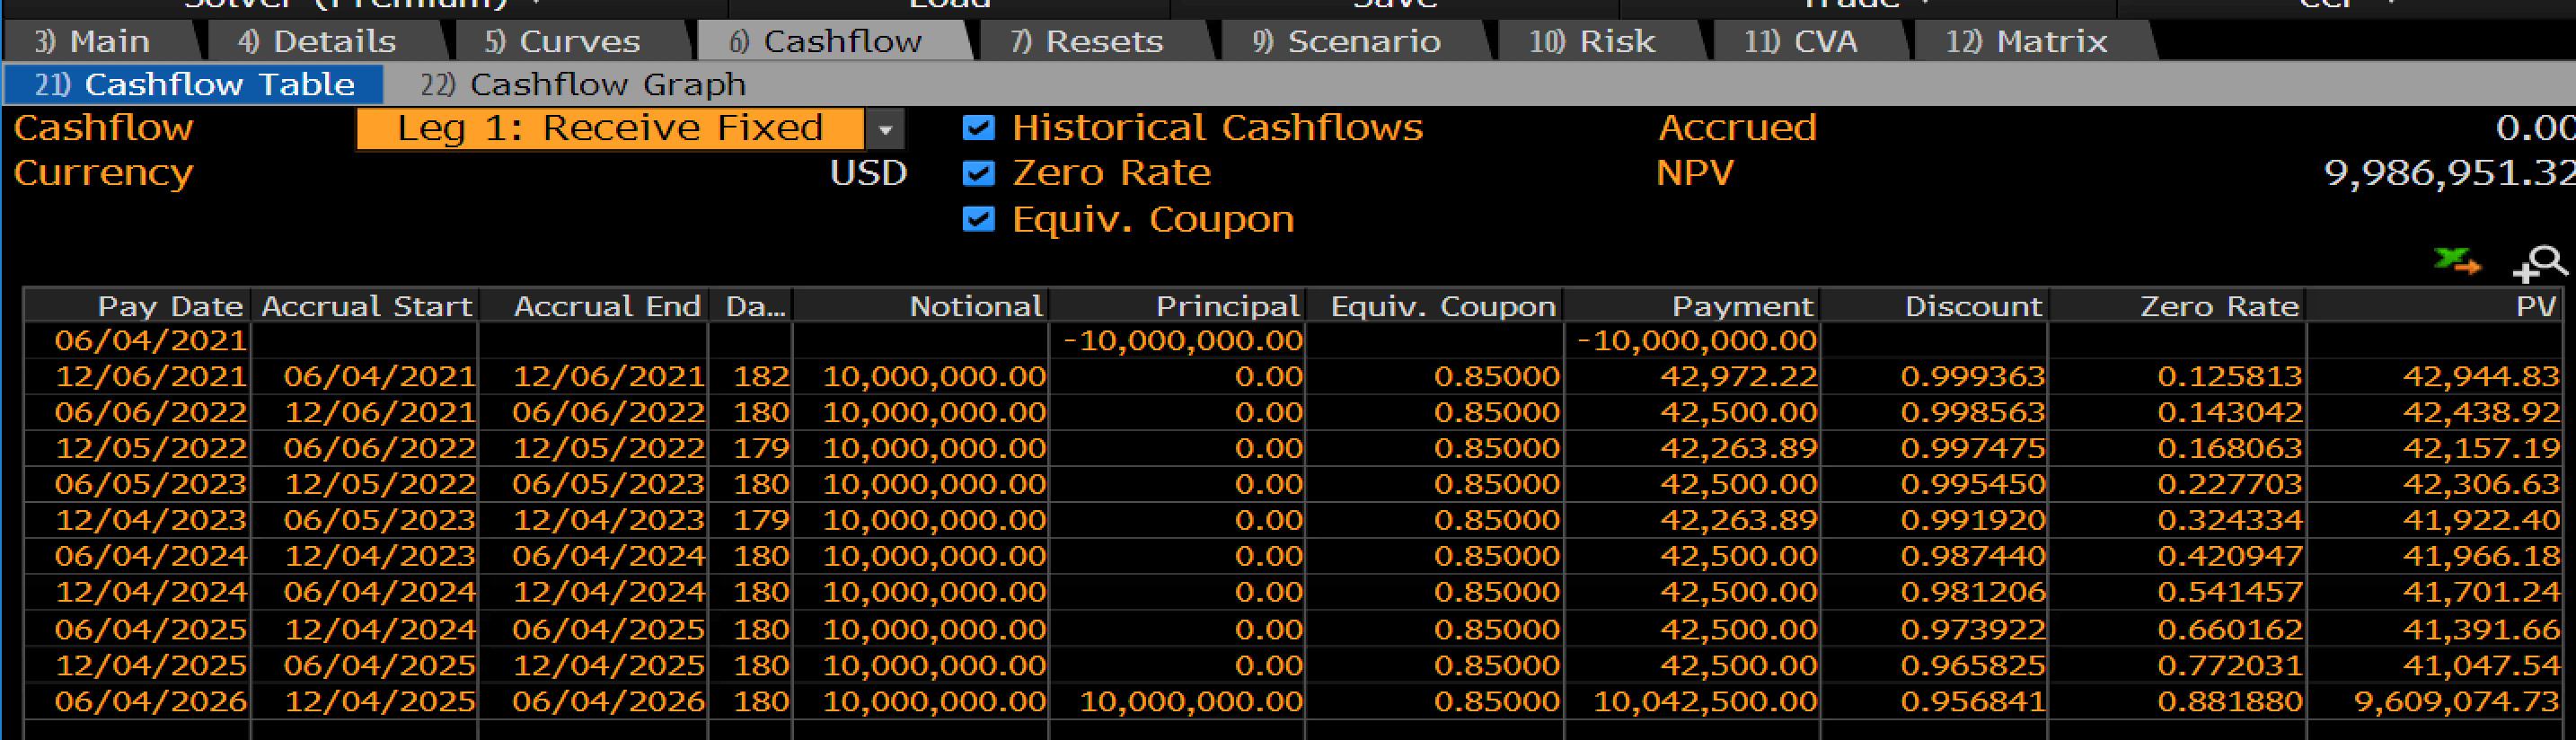

In [13]:
floatingleg=cashflow[cashflow['leg']=='Floating']
floatingleg

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
10,2021-06-02,2021-06-04,2021-09-07,10000000,USD,Floating,Pay,Interest Rate Swap,0.001285,0.001285,0,95,0.263889,3390.972222,0.999661,3389.822743
11,2021-09-02,2021-09-07,2021-12-06,10000000,USD,Floating,Pay,Interest Rate Swap,0.001211,0.001249,0,185,0.513889,3028.668959,0.999358,3026.725599
12,2021-12-02,2021-12-06,2022-03-04,10000000,USD,Floating,Pay,Interest Rate Swap,0.001656,0.001380,0,273,0.758333,4047.602970,0.998954,4043.369210
13,2022-03-02,2022-03-04,2022-06-06,10000000,USD,Floating,Pay,Interest Rate Swap,0.001604,0.001437,0,367,1.019444,4187.121716,0.998536,4180.991389
14,2022-06-02,2022-06-06,2022-09-06,10000000,USD,Floating,Pay,Interest Rate Swap,0.001886,0.001527,0,459,1.275000,4819.236689,0.998055,4809.862901
15,2022-09-01,2022-09-06,2022-12-05,10000000,USD,Floating,Pay,Interest Rate Swap,0.002526,0.001691,0,549,1.525000,6315.253805,0.997425,6298.992176
16,2022-12-01,2022-12-05,2023-03-06,10000000,USD,Floating,Pay,Interest Rate Swap,0.003574,0.001958,0,640,1.777778,9033.482540,0.996525,9002.089514
17,2023-03-02,2023-03-06,2023-06-05,10000000,USD,Floating,Pay,Interest Rate Swap,0.004271,0.002246,0,731,2.030556,10795.506051,0.995450,10746.388396
18,2023-06-01,2023-06-05,2023-09-05,10000000,USD,Floating,Pay,Interest Rate Swap,0.006549,0.002726,0,823,2.286111,16735.570056,0.993787,16631.592237
19,2023-08-31,2023-09-05,2023-12-04,10000000,USD,Floating,Pay,Interest Rate Swap,0.007501,0.003196,0,913,2.536111,18751.488341,0.991927,18600.107685


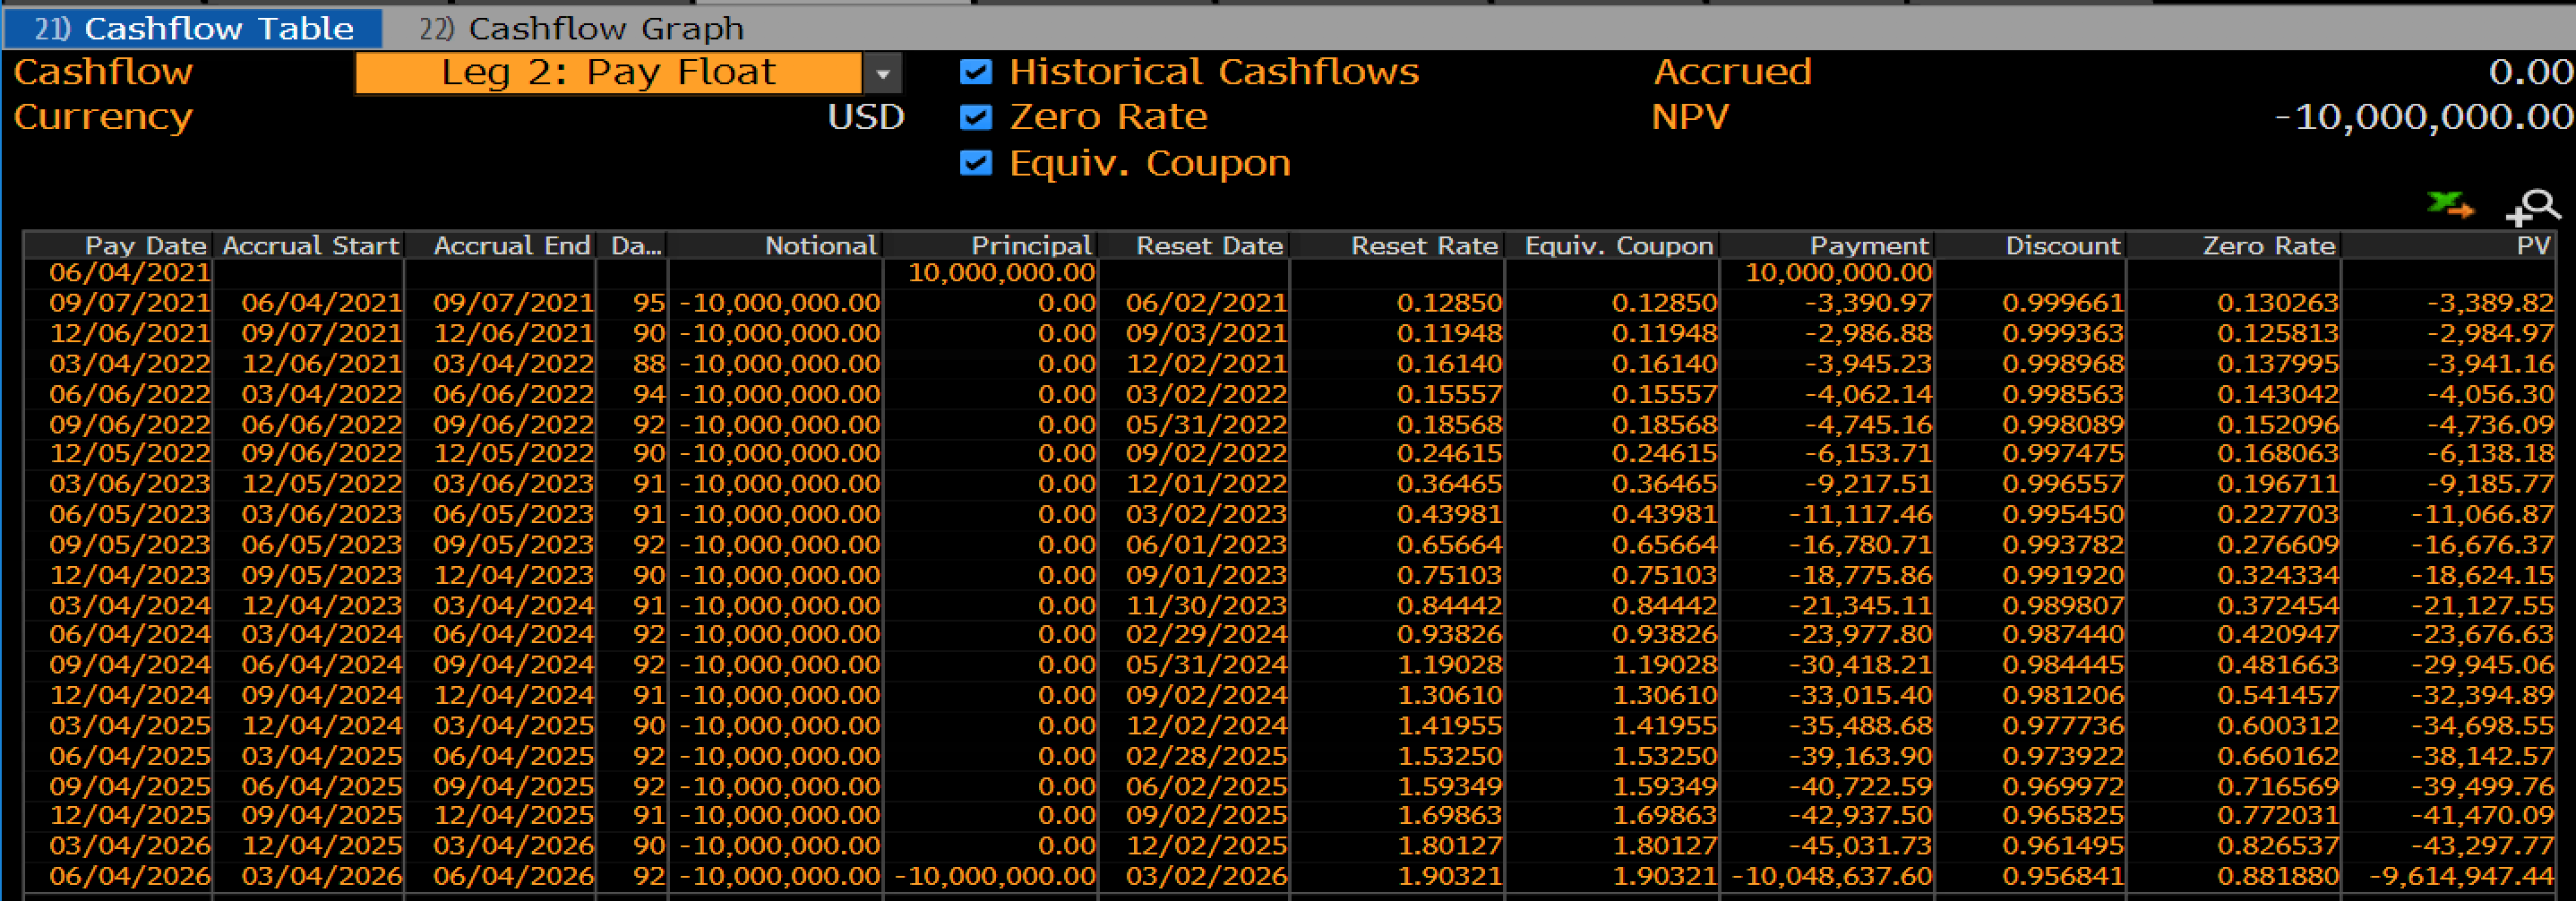

In [14]:
times=['3M','72D','133D','193D','259D','321D','387D','2Y','3Y','4Y','5Y','6Y',
'7Y','8Y','9Y','10Y','11Y','12Y','15Y','20Y','25Y','30Y','40Y','50Y']

In [15]:
keyrisk = []
keyrisk2 = []
fixedlegkeyrisk = []
floatinglegkeyrisk = []
fixedleg1keyrisk = []
floatingleg1keyrisk=[]
fixedleg2keyrisk = []
floatingleg2keyrisk=[]
fixedlegpv=-1*swappositiondata["notional"]+result.get('fixedLegPv')+fixedleg['discountFactor'].tail(1)*swappositiondata["notional"]
floatinglegpv=swappositiondata["notional"]+result.get('floatingLegPv')-floatingleg['discountFactor'].tail(1)*swappositiondata["notional"]
price=result.get('pv')
bp=1
for dt in times:
    discountCurve['applyShock']={"method": "keyrate","shockValues" : [{"tenor":dt,"shockValue" : bp}]}
    floatingLegForecastCurve['applyShock']={"method": "keyrate","shockValues" : [{"tenor":dt,"shockValue" : bp}]}
    try:
        bondresult1 = api.createTask(CalculationType.INTEREST_RATES_SWAP, swappositiondata,True)
        result1=json.loads(bondresult1["result"])
    except RhoovaError as e:
        e.printPretty() 
    cashflow1=pd.DataFrame(result1.get('data'))
    fixedleg1=cashflow1[cashflow1['leg']=='Fixed']    
    fixedleg1pv=-1*swappositiondata["notional"]+result1.get('fixedLegPv')+fixedleg1['discountFactor'].tail(1)*swappositiondata["notional"]
    fixedleg1keyrate=list(fixedlegpv)[0]-list(fixedleg1pv)[0]
    fixedleg1keyrisk.append(fixedleg1keyrate)
    
    floatingleg1=cashflow1[cashflow1['leg']=='Floating']
    floatingleg1pv=swappositiondata["notional"]+result1.get('floatingLegPv')-floatingleg1['discountFactor'].tail(1)*swappositiondata["notional"] 
    floatingleg1keyrate=list(floatinglegpv)[0]-list(floatingleg1pv)[0]
    floatingleg1keyrisk.append(floatingleg1keyrate)
   
    price1=result1.get('pv')
    keyrate=price-price1
    keyrisk.append(keyrate)



In [16]:
pTable = pt.PrettyTable(["Tenor",'Receive Leg', 'Pay Leg','Total'])
i=0
for i in range(0,len(fixedleg1keyrisk)):
    pTable.add_row([times[i], fixedleg1keyrisk[i],floatingleg1keyrisk[i],keyrisk[i]])
    i=i+1
pTable.add_row(["-----", "-----","-----","-----"])
pTable.add_row(["Total", sum(fixedleg1keyrisk),sum(floatingleg1keyrisk),sum(keyrisk)])
pTable.align = 'c'
pTable.float_format = '.2'
print(pTable)

+-------+-------------+---------+---------+
| Tenor | Receive Leg | Pay Leg |  Total  |
+-------+-------------+---------+---------+
|   3M  |     0.00    |   0.00  |   0.00  |
|  72D  |     0.22    |   0.00  |   0.22  |
|  133D |     1.99    |   0.00  |   1.99  |
|  193D |     0.47    |   0.00  |   0.47  |
|  259D |     3.86    |   0.00  |   3.86  |
|  321D |     1.06    |   0.00  |   1.06  |
|  387D |     5.37    |   0.00  |   5.37  |
|   2Y  |    13.92    |   0.00  |  13.92  |
|   3Y  |    25.46    |   0.00  |  25.46  |
|   4Y  |    33.57    |  -0.00  |  33.57  |
|   5Y  |   4882.10   |  -0.00  | 4882.10 |
|   6Y  |     0.00    |   0.00  |   0.00  |
|   7Y  |     0.00    |   0.00  |   0.00  |
|   8Y  |     0.00    |   0.00  |   0.00  |
|   9Y  |     0.00    |   0.00  |   0.00  |
|  10Y  |     0.00    |   0.00  |   0.00  |
|  11Y  |     0.00    |   0.00  |   0.00  |
|  12Y  |     0.00    |   0.00  |   0.00  |
|  15Y  |     0.00    |   0.00  |   0.00  |
|  20Y  |     0.00    |   0.00  

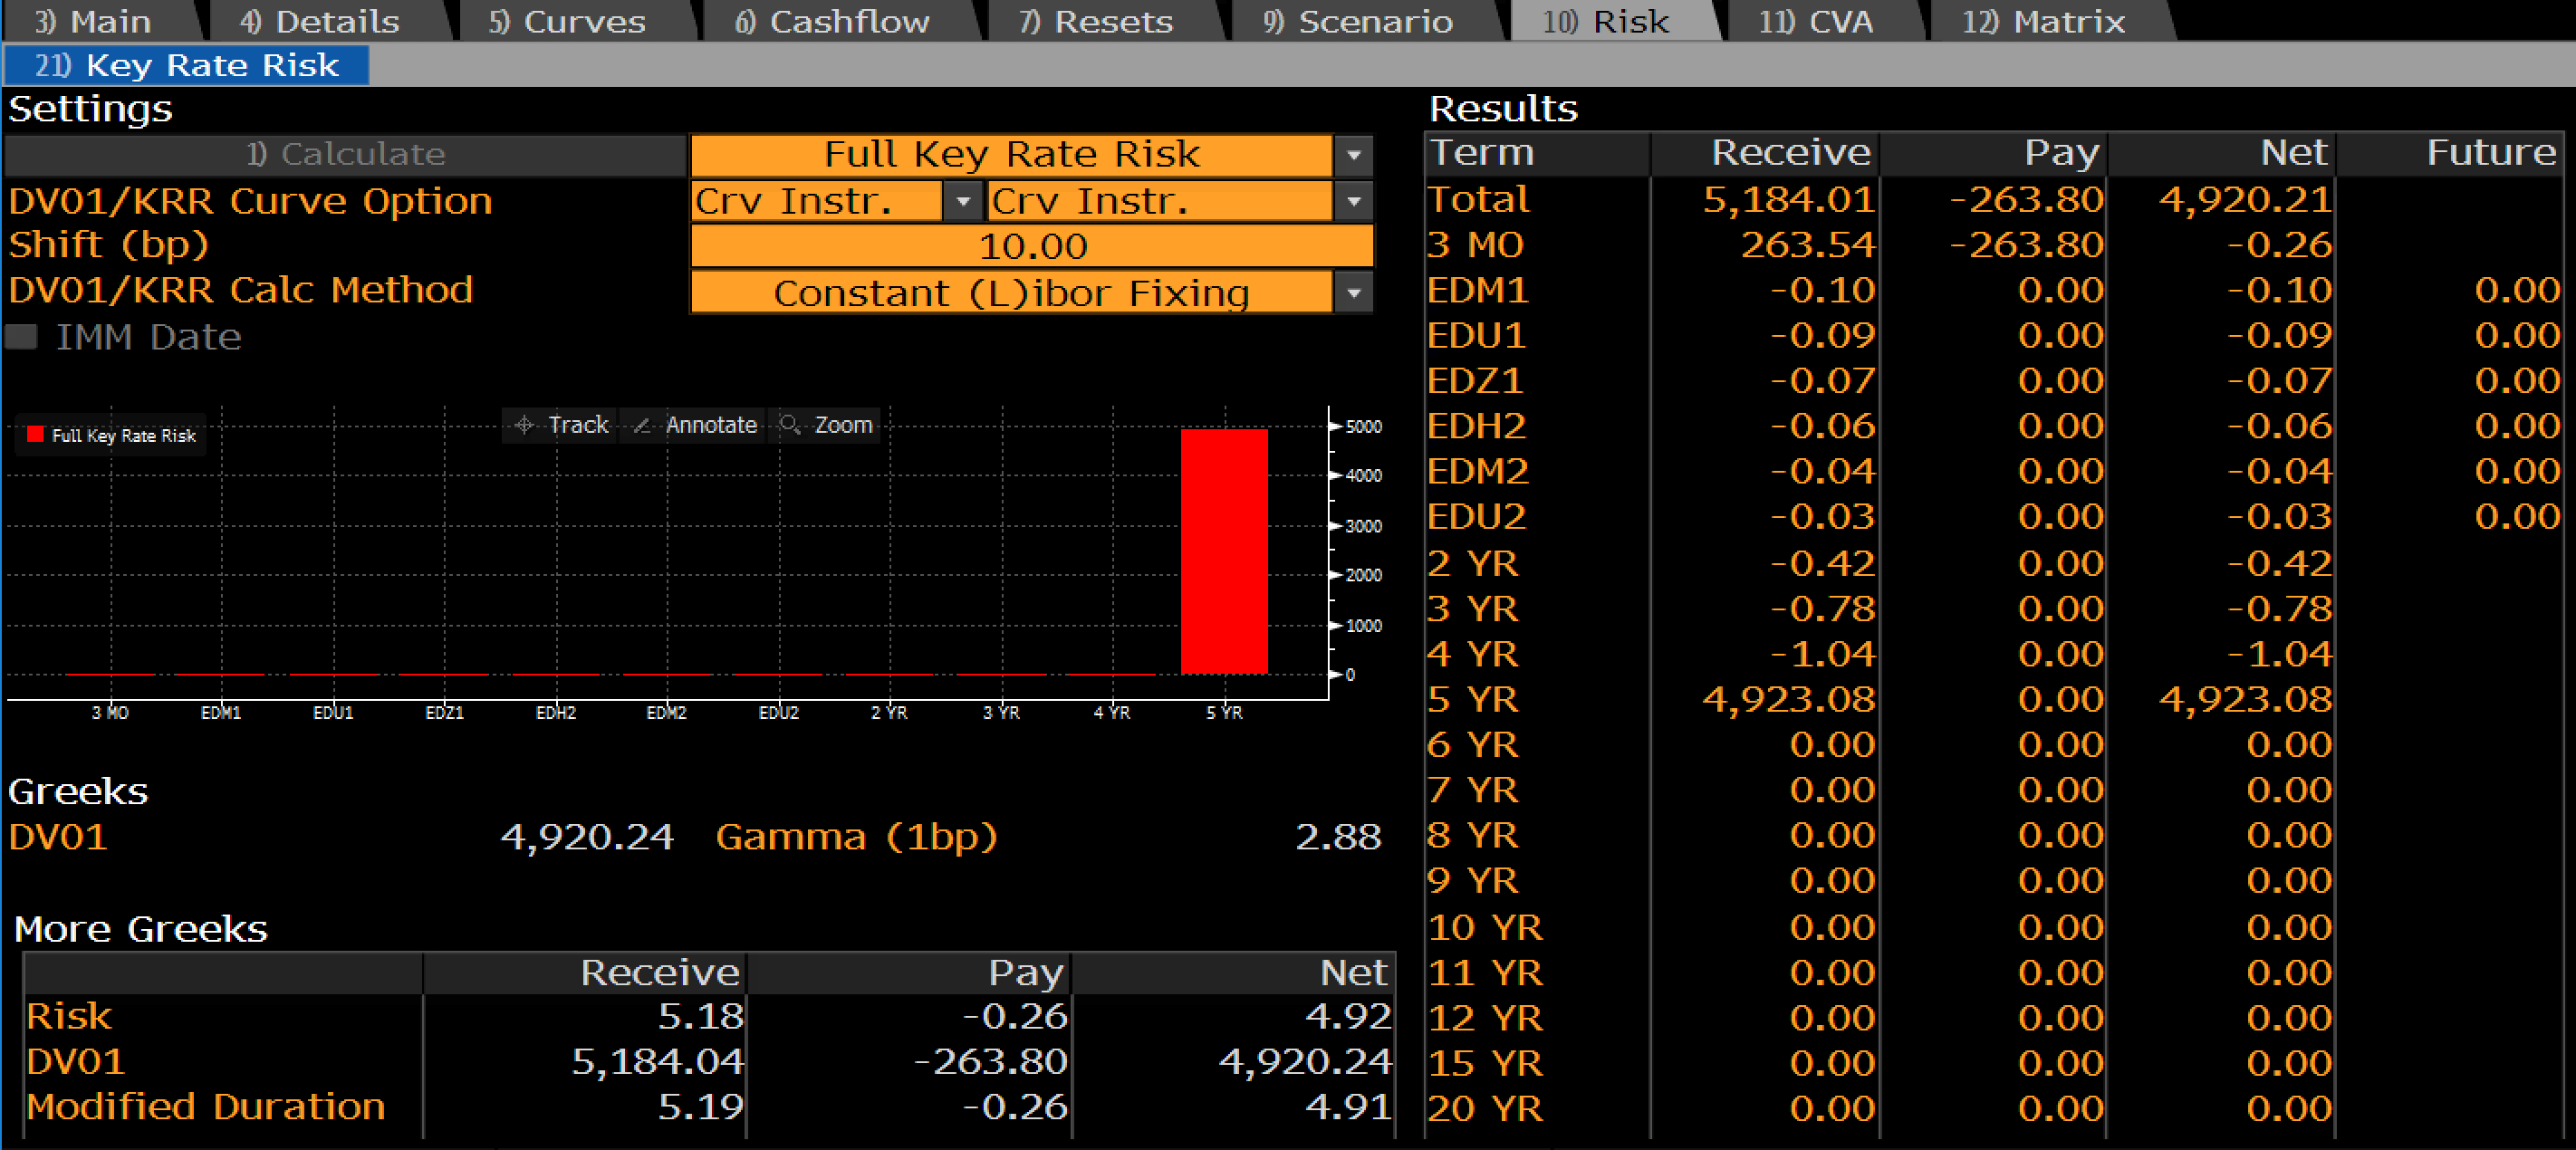